In [5]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from glob import glob
print("yes")


yes


In [6]:
# === Metadata Constants ===
sun_elevation = 69.011613
sun_zenith_angle = 90 - sun_elevation
theta_rad = np.deg2rad(sun_zenith_angle)
d = 0.983  # Earth–Sun distance (AU)

# Lmin, Lmax for RS-2A LISS-4 (Green, Red, NIR)
Lmin = [0.0, 0.0, 0.0]
Lmax = [52.0, 47.0, 31.5]

# Esun values for RS-2A (Green, Red, NIR)
Esun = [185.347, 158.262, 110.81]
print("yes")

yes


In [7]:
def dn_to_radiance(dn_band, lmin, lmax):
    return lmin + (dn_band / 255.0) * (lmax - lmin)

def radiance_to_reflectance(L, esun, d, theta_rad):
    return (np.pi * L * d**2) / (esun * np.cos(theta_rad))


In [8]:
# Make sure paths are correct based on where your notebook is
input_folder = "CLOUD/data/train/cloudimages"
output_folder = "CLOUD/data/train/reflectance"


# Get all .tif images
image_paths = glob(os.path.join(input_folder, "*.tif"))
print("Found", len(image_paths), "images")

# Print image names to verify
for img in image_paths:
    print(" -", img)


Found 0 images


In [9]:
import os
print("Current working directory:")
print(os.getcwd())


Current working directory:
/Users/shreya/ CLOUD/notebooks


In [10]:
from PIL import Image
import os
from glob import glob

input_folder = "../data/train/cloudimages"
output_folder = "../data/train/cloudimages_tiff"
os.makedirs(output_folder, exist_ok=True)

# Convert all JPGs to TIFFs
jpg_paths = glob(os.path.join(input_folder, "*.jpg"))

for path in jpg_paths:
    img = Image.open(path).convert("RGB")  # Ensure 3-channel
    filename = os.path.basename(path).replace(".jpg", ".tif")
    output_path = os.path.join(output_folder, filename)
    img.save(output_path, format="TIFF")
    print(f"Saved: {output_path}")


In [11]:
import rasterio

with rasterio.open("../data/train/cloudimages_tiff/R2F01JAN2025071113010900054SSANSTUC00GTDD (1).tif") as src:
    crs = src.crs
    transform = src.transform
    meta = src.meta


RasterioIOError: ../data/train/cloudimages_tiff/R2F01JAN2025071113010900054SSANSTUC00GTDD (1).tif: No such file or directory

In [12]:
import os

# Define your target dataset folder inside your Jupyter project
project_folder = "../data/train/cloud"

# Step 1: Check if it exists
if os.path.exists(project_folder):
    if os.path.isdir(project_folder):
        print(f"✅ Folder already exists: {project_folder}")
    else:
        print(f"⚠️ A file named 'cloud' exists at {project_folder}. Please delete it manually and rerun this cell.")
else:
    # Step 2: Create the folder
    os.makedirs(project_folder, exist_ok=True)
    print(f"📁 Created folder: {project_folder}")

# Step 3: User instructions to move files
print("\n📦 Now please move your dataset files (from ~/Desktop/clouds) into this folder:")
print(f"👉 Full path: {os.path.abspath(project_folder)}")
print("\nYou can do this by opening a Finder window and dragging files from your Desktop folder into it.")

# Optional: Show current contents of the folder
print("\n📂 Current contents of the folder:")
print(os.listdir(project_folder))


✅ Folder already exists: ../data/train/cloud

📦 Now please move your dataset files (from ~/Desktop/clouds) into this folder:
👉 Full path: /Users/shreya/ CLOUD/data/train/cloud

You can do this by opening a Finder window and dragging files from your Desktop folder into it.

📂 Current contents of the folder:
['BH_RAF16SEP2024040353009000054SSANSTUC00GTDA', '.DS_Store', 'BH_RAF08MAY2024038491010700053SSANSTUC00GTDA', 'BH_R2F15JUN2024068272009300044SSANSTUC00GTDD', 'R2F02FEB2025071568010100068SSANSTUC00GTDB', 'RAF13NOV2024041177009200044SSANSTUC00GTDC', 'R2F01JAN2025071113010900054SSANSTUC00GTDD', 'R2F01JAN2025071113010900054SSANSTUC00GTDD 2', 'BH_R2F30APR2024067624010300067SSANSTUC00GTDB', 'BH_R2F05AUG2024068996010800054SSANSTUC00GTDD', 'BH_RAF22JUN2024039131009200052SSANSTUC00GTDA', 'RAF18MAY2025043819011000054SSANSTUC00GTDC', 'BH_RAF10SEP2024040267010800054SSANSTUC00GTDC', 'BH_R2F27AUG2024069309009800054SSANSTUC00GTDA', 'BH_R2F01SEP2024069380009900053SSANSTUC00GTDC', 'BH_RAF19JUL2024039

In [13]:
import os
folder = "../data/train/cloud"
os.system(f"open {folder}")


0

In [14]:
import os

base_path = "../data/train/cloud/"
scene_folders = [f.path for f in os.scandir(base_path) if f.is_dir()]

for scene in scene_folders:
    meta_path = os.path.join(scene, "BAND_META.txt")
    print(f"🔍 Reading metadata from: {meta_path}")
    
    if os.path.exists(meta_path):
        with open(meta_path, "r") as f:
            for line in f:
                if "SunElevationAtCenter" in line:
                    sun_elevation = float(line.split("=")[-1].strip())
                elif "B2_Lmin" in line:
                    B2_Lmin = float(line.split("=")[-1].strip())
                elif "B2_Lmax" in line:
                    B2_Lmax = float(line.split("=")[-1].strip())
                elif "B3_Lmin" in line:
                    B3_Lmin = float(line.split("=")[-1].strip())
                elif "B3_Lmax" in line:
                    B3_Lmax = float(line.split("=")[-1].strip())
                elif "B4_Lmin" in line:
                    B4_Lmin = float(line.split("=")[-1].strip())
                elif "B4_Lmax" in line:
                    B4_Lmax = float(line.split("=")[-1].strip())
        
        print(f"✅ Sun Elevation: {sun_elevation}")
        print(f"✅ Band2 Lmin/Lmax: {B2_Lmin} / {B2_Lmax}")
        print(f"✅ Band3 Lmin/Lmax: {B3_Lmin} / {B3_Lmax}")
        print(f"✅ Band4 Lmin/Lmax: {B4_Lmin} / {B4_Lmax}")
    else:
        print("❌ BAND_META.txt not found.")


🔍 Reading metadata from: ../data/train/cloud/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA/BAND_META.txt
✅ Sun Elevation: 60.786925
✅ Band2 Lmin/Lmax: 0.0 / 52.0
✅ Band3 Lmin/Lmax: 0.0 / 47.0
✅ Band4 Lmin/Lmax: 0.0 / 31.5
🔍 Reading metadata from: ../data/train/cloud/BH_RAF08MAY2024038491010700053SSANSTUC00GTDA/BAND_META.txt
✅ Sun Elevation: 70.708525
✅ Band2 Lmin/Lmax: 0.0 / 52.0
✅ Band3 Lmin/Lmax: 0.0 / 47.0
✅ Band4 Lmin/Lmax: 0.0 / 31.5
🔍 Reading metadata from: ../data/train/cloud/BH_R2F15JUN2024068272009300044SSANSTUC00GTDD/BAND_META.txt
✅ Sun Elevation: 65.32242
✅ Band2 Lmin/Lmax: 0.0 / 52.0
✅ Band3 Lmin/Lmax: 0.0 / 47.0
✅ Band4 Lmin/Lmax: 0.0 / 31.5
🔍 Reading metadata from: ../data/train/cloud/R2F02FEB2025071568010100068SSANSTUC00GTDB/BAND_META.txt
✅ Sun Elevation: 46.170577
✅ Band2 Lmin/Lmax: 0.0 / 52.0
✅ Band3 Lmin/Lmax: 0.0 / 47.0
✅ Band4 Lmin/Lmax: 0.0 / 31.5
🔍 Reading metadata from: ../data/train/cloud/RAF13NOV2024041177009200044SSANSTUC00GTDC/BAND_META.txt
✅ Sun Elevation: 33

In [15]:
import rasterio
import numpy as np
import os

def read_bands(scene_path):
    band_paths = {
        "BAND2": os.path.join(scene_path, "BAND2.tif"),
        "BAND3": os.path.join(scene_path, "BAND3.tif"),
        "BAND4": os.path.join(scene_path, "BAND4.tif")
    }

    bands = {}
    for band_name, path in band_paths.items():
        with rasterio.open(path) as src:
            bands[band_name] = src.read(1).astype(np.float32)
            meta = src.meta  # use BAND2's metadata for writing later

    return bands, meta



In [16]:
from math import cos, pi, radians

def read_metadata(meta_path):
    sun_elevation = None
    Lmin = {}
    Lmax = {}

    with open(meta_path, "r") as f:
        for line in f:
            line = line.strip()
            if "SunElevationAtCenter" in line:
                sun_elevation = float(line.split("=")[1])
            for band in ["B2", "B3", "B4"]:
                if f"{band}_Lmin" in line:
                    Lmin[band] = float(line.split("=")[1])
                elif f"{band}_Lmax" in line:
                    Lmax[band] = float(line.split("=")[1])
    return sun_elevation, Lmin, Lmax

def dn_to_radiance(dn, lmin, lmax):
    return lmin + (dn / 255.0) * (lmax - lmin)

def radiance_to_reflectance(L, Esun, d, theta_rad):
    return (pi * L * d**2) / (Esun * cos(theta_rad))

def convert_to_reflectance(bands, sun_elevation, Lmin, Lmax):
    d = 1.0  # assume average Earth-Sun distance in AU
    theta_rad = radians(90 - sun_elevation)

    Esun = {
        "BAND2": 185.347,
        "BAND3": 158.262,
        "BAND4": 110.81
    }

    reflectance = {}
    for band in bands:
        L = dn_to_radiance(bands[band], Lmin[band.replace("BAND", "B")], Lmax[band.replace("BAND", "B")])
        reflectance[band] = radiance_to_reflectance(L, Esun[band], d, theta_rad)
        reflectance[band] = np.clip(reflectance[band], 0, 1)  # for safety

    return reflectance


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_reflectance_by_class(reflectance, mask):
    classes = {
        0: "NOCLOUD",
        1: "CLOUD",
        2: "SHADOW"
    }

    bands = ["BAND2", "BAND3", "BAND4"]
    colors = {0: "gray", 1: "red", 2: "blue"}

    plt.figure(figsize=(18, 4))

    for i, band in enumerate(bands):
        band_data = reflectance[band].flatten()
        band_mask = mask.flatten()

        plt.subplot(1, 3, i + 1)
        for cls in [0, 1, 2]:
            class_vals = band_data[band_mask == cls]
            plt.hist(class_vals, bins=100, alpha=0.6, label=f"{classes[cls]}", color=colors[cls])
        
        plt.title(f"{band} Reflectance Histogram")
        plt.xlabel("Reflectance")
        plt.ylabel("Pixel Count")
        plt.legend()

    plt.tight_layout()
    plt.show()

    print("📊 Class-wise Reflectance Statistics:")
    for cls in [0, 1, 2]:
        print(f"\n--- {classes[cls]} ---")
        for band in bands:
            vals = reflectance[band][mask == cls]
            if len(vals) == 0:
                print(f"{band}: [no pixels]")
                continue
            print(f"{band}: min={vals.min():.3f}, mean={vals.mean():.3f}, max={vals.max():.3f}")


In [18]:
def classify_pixels(reflectance):
    b2 = reflectance["BAND2"]
    b3 = reflectance["BAND3"]
    b4 = reflectance["BAND4"]

    mask = np.zeros_like(b2, dtype=np.uint8)

    # 1 = CLOUD: bright in Band2 (green), dark in Band4 (NIR)
    cloud = (b2 > 0.2) & (b4 < 0.15)

    # 2 = SHADOW: dark in all bands
    shadow = (b2 < 0.07) & (b3 < 0.07) & (b4 < 0.07)

    mask[cloud] = 1
    mask[shadow] = 2

    return mask


In [19]:
def save_mask(mask, meta, output_path):
    meta.update({
        "count": 1,
        "dtype": "uint8"
    })

    with rasterio.open(output_path, "w", **meta) as dst:
        dst.write(mask, 1)

    print(f"✅ Saved mask to: {output_path}")


In [20]:
scene_path = "../data/train/cloud/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC"

# Step 1: Read Bands
bands, meta = read_bands(scene_path)

# Step 2: Metadata → Reflectance
meta_path = os.path.join(scene_path, "BAND_META.txt")
sun_elevation, Lmin, Lmax = read_metadata(meta_path)
reflectance = convert_to_reflectance(bands, sun_elevation, Lmin, Lmax)

# Step 3: Classify Pixels
mask = classify_pixels(reflectance)

# Step 4: Save Mask
save_mask(mask, meta, os.path.join(scene_path, "mask.tif"))


✅ Saved mask to: ../data/train/cloud/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC/mask.tif


In [21]:
scene_path = "../data/train/cloud/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC"


In [22]:
import os

print("Folder exists:", os.path.exists(scene_path))
print("Files in folder:", os.listdir(scene_path))


Folder exists: True
Files in folder: ['ACC_REP.txt', 'BAND_META.txt', 'RAF10SEP2024040267010800054SSANSTUC00GTDC.jpg.aux.xml', 'RAF10SEP2024040267010800054SSANSTUC00GTDC.jpg', 'RAF10SEP2024040267010800054SSANSTUC00GTDC.meta', 'BAND4.tif', 'mask.tif', 'BAND2.tif', 'BAND3.tif']


In [23]:
bands, meta = read_bands(scene_path)

print("✅ Bands loaded:")
for k in bands:
    print(f"{k}: shape = {bands[k].shape}, dtype = {bands[k].dtype}")


✅ Bands loaded:
BAND2: shape = (16722, 17761), dtype = float32
BAND3: shape = (16722, 17761), dtype = float32
BAND4: shape = (16722, 17761), dtype = float32


In [24]:
def read_metadata(meta_path):
    sun_elevation = None
    Lmin = {}
    Lmax = {}

    with open(meta_path, "r") as f:
        for line in f:
            if "SunElevationAtCenter" in line:
                sun_elevation = float(line.split("=")[-1].strip())
            for band in ["B2", "B3", "B4"]:
                if f"{band}_Lmin" in line:
                    Lmin[band] = float(line.split("=")[-1].strip())
                elif f"{band}_Lmax" in line:
                    Lmax[band] = float(line.split("=")[-1].strip())
                    
    return sun_elevation, Lmin, Lmax

# Call it
meta_path = os.path.join(scene_path, "BAND_META.txt")
sun_elev, Lmin, Lmax = read_metadata(meta_path)

print("✅ Sun Elevation:", sun_elev)
print("✅ Lmin:", Lmin)
print("✅ Lmax:", Lmax)


✅ Sun Elevation: 62.659743
✅ Lmin: {'B2': 0.0, 'B3': 0.0, 'B4': 0.0}
✅ Lmax: {'B2': 52.0, 'B3': 47.0, 'B4': 31.5}


In [25]:
from math import pi, radians, cos

def dn_to_radiance(dn, lmin, lmax):
    return lmin + (dn / 255.0) * (lmax - lmin)

def radiance_to_reflectance(L, Esun, d, theta_rad):
    return (pi * L * d**2) / (Esun * cos(theta_rad))

def convert_to_reflectance(bands, sun_elevation, Lmin, Lmax):
    Esun = {
        "BAND2": 185.347,
        "BAND3": 158.262,
        "BAND4": 110.81
    }
    d = 1.0  # Earth-Sun distance (can be taken from CSV later)
    theta_rad = radians(90 - sun_elevation)

    reflectance = {}
    for band in bands:
        band_key = band.replace("BAND", "B")  # e.g., BAND2 → B2
        L = dn_to_radiance(bands[band], Lmin[band_key], Lmax[band_key])
        reflectance[band] = np.clip(
            radiance_to_reflectance(L, Esun[band], d, theta_rad),
            0, 1
        )

    return reflectance

# Call it
reflectance = convert_to_reflectance(bands, sun_elev, Lmin, Lmax)

print("✅ Reflectance computed.")
for k in reflectance:
    print(f"{k}: min={reflectance[k].min():.3f}, max={reflectance[k].max():.3f}")


✅ Reflectance computed.
BAND2: min=0.000, max=1.000
BAND3: min=0.000, max=1.000
BAND4: min=0.000, max=1.000


In [25]:
from math import pi, radians, cos

def dn_to_radiance(dn, lmin, lmax):
    return lmin + (dn / 255.0) * (lmax - lmin)

def radiance_to_reflectance(L, Esun, d, theta_rad):
    return (pi * L * d**2) / (Esun * cos(theta_rad))

def convert_to_reflectance(bands, sun_elevation, Lmin, Lmax):
    Esun = {
        "BAND2": 185.347,
        "BAND3": 158.262,
        "BAND4": 110.81
    }
    d = 1.0  # Earth-Sun distance (can be taken from CSV later)
    theta_rad = radians(90 - sun_elevation)

    reflectance = {}
    for band in bands:
        band_key = band.replace("BAND", "B")  # e.g., BAND2 → B2
        L = dn_to_radiance(bands[band], Lmin[band_key], Lmax[band_key])
        reflectance[band] = np.clip(
            radiance_to_reflectance(L, Esun[band], d, theta_rad),
            0, 1
        )

    return reflectance

# Call it
reflectance = convert_to_reflectance(bands, sun_elev, Lmin, Lmax)

print("✅ Reflectance computed.")
for k in reflectance:
    print(f"{k}: min={reflectance[k].min():.3f}, max={reflectance[k].max():.3f}")


✅ Reflectance computed.
BAND2: min=0.000, max=1.000
BAND3: min=0.000, max=1.000
BAND4: min=0.000, max=1.000


In [ ]:
def classify_pixels_temp(reflectance):
    b2 = reflectance["BAND2"]
    b3 = reflectance["BAND3"]
    b4 = reflectance["BAND4"]

    mask = np.zeros_like(b2, dtype=np.uint8)

    # Optional: ignore zero-value pixels (probably nodata)
    valid = (b2 > 0) & (b3 > 0) & (b4 > 0)

    # 🌥️ CLOUD: very bright in all visible bands
    cloud = (b2 > 0.35) & (b3 > 0.23) & (b4 > 0.22)

    # 🌑 SHADOW: very dark in all bands + valid NDVI filtering
   
    ndvi = (b4 - b3) / (b4 + b3 + 1e-6)
    shadow = (
    (b2 < 0.1) & (b3 < 0.1) & (b4 < 0.12) & 
    (ndvi < 0.15)
    )



    mask[cloud] = 1
    mask[shadow] = 2

    return mask


In [ ]:
mask = classify_pixels_temp(reflectance)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_reflectance_by_class(reflectance, mask):
    classes = {
        0: "NOCLOUD",
        1: "CLOUD",
        2: "SHADOW"
    }

    bands = ["BAND2", "BAND3", "BAND4"]
    colors = {0: "gray", 1: "red", 2: "blue"}

    plt.figure(figsize=(18, 4))

    for i, band in enumerate(bands):
        band_data = reflectance[band].flatten()
        band_mask = mask.flatten()

        plt.subplot(1, 3, i + 1)
        for cls in [0, 1, 2]:
            class_vals = band_data[band_mask == cls]
            if len(class_vals) > 0:
                plt.hist(class_vals, bins=100, alpha=0.6,
                         label=f"{classes[cls]}", color=colors[cls])
        
        plt.title(f"{band} Reflectance Histogram")
        plt.xlabel("Reflectance")
        plt.ylabel("Pixel Count")
        plt.legend()

    plt.tight_layout()
    plt.show()

    print("📊 Class-wise Reflectance Statistics:")
    for cls in [0, 1, 2]:
        print(f"\n--- {classes[cls]} ---")
        for band in bands:
            vals = reflectance[band][mask == cls]
            if len(vals) == 0:
                print(f"{band}: [no pixels]")
            else:
                print(f"{band}: min={vals.min():.3f}, mean={vals.mean():.3f}, max={vals.max():.3f}")


In [29]:
unique, counts = np.unique(mask, return_counts=True)
print("Mask class counts:", dict(zip(unique, counts)))


Mask class counts: {np.uint8(0): np.int64(2085088), np.uint8(1): np.int64(234360721), np.uint8(2): np.int64(60553633)}


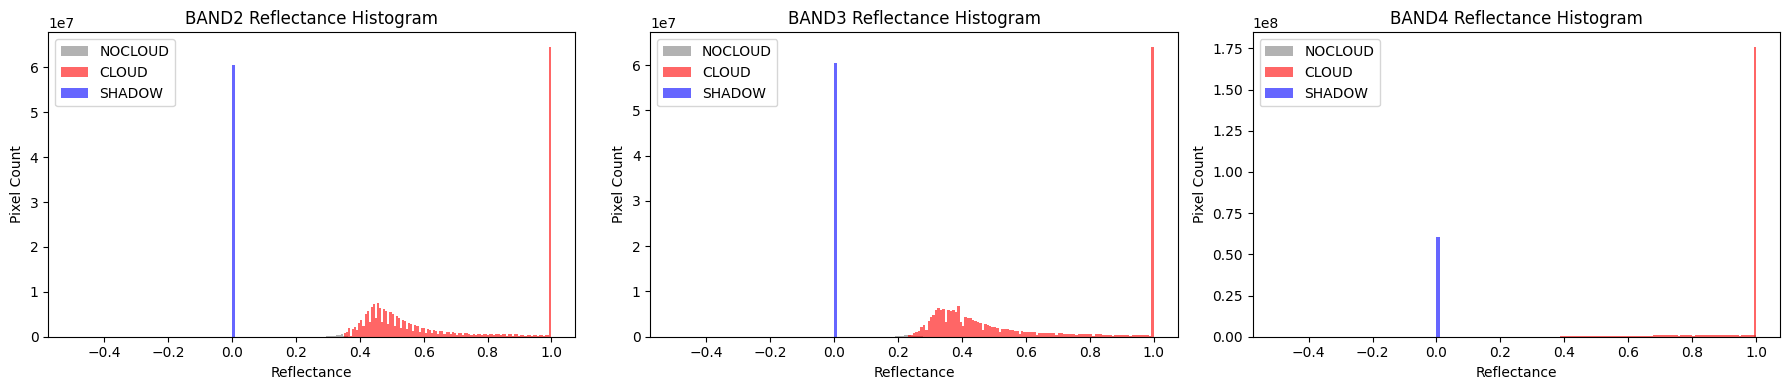

📊 Class-wise Reflectance Statistics:

--- NOCLOUD ---
BAND2: min=0.233, mean=0.334, max=1.000
BAND3: min=0.037, mean=0.244, max=1.000
BAND4: min=0.256, mean=0.795, max=1.000

--- CLOUD ---
BAND2: min=0.350, mean=0.665, max=1.000
BAND3: min=0.231, mean=0.606, max=1.000
BAND4: min=0.233, mean=0.940, max=1.000

--- SHADOW ---
BAND2: min=0.000, mean=0.000, max=0.000
BAND3: min=0.000, mean=0.000, max=0.000
BAND4: min=0.000, mean=0.000, max=0.000


In [30]:
analyze_reflectance_by_class(reflectance, mask)


In [ ]:
mask = classify_pixels_temp(reflectance)

unique, counts = np.unique(mask, return_counts=True)
label_map = {0: "NOCLOUD", 1: "CLOUD", 2: "SHADOW"}
print("✅ Mask Class Distribution:")
for u, c in zip(unique, counts):
    print(f"{label_map[u]} ({u}): {c} pixels")


In [32]:
save_mask(mask, meta, scene_path)


RasterioIOError: Attempt to create new tiff file '../data/train/cloud/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC' failed: Is a directory

In [38]:
unique, counts = np.unique(mask, return_counts=True)
print(dict(zip(unique, counts)))


{np.uint8(0): np.int64(2085088), np.uint8(1): np.int64(234360721), np.uint8(2): np.int64(60553633)}


In [39]:
import os

def save_mask(mask, meta, scene_path, output_root="../outputs/masks"):
    """
    Save a georeferenced mask with scene name in the output folder.
    - mask: numpy array (HxW)
    - meta: rasterio metadata
    - scene_path: full path to the scene folder
    - output_root: folder where masks will be stored
    """

    # Ensure output folder exists
    os.makedirs(output_root, exist_ok=True)

    # Extract scene name and set output path
    scene_name = os.path.basename(scene_path.rstrip("/"))
    output_path = os.path.join(output_root, f"{scene_name}_mask.tif")

    # Update metadata and write
    meta.update({
        "count": 1,
        "dtype": "uint8"
    })

    with rasterio.open(output_path, "w", **meta) as dst:
        dst.write(mask, 1)

    print(f"✅ Saved georeferenced mask: {output_path}")


In [40]:
save_mask(mask, meta, scene_path, output_root="../outputs/masks")

✅ Saved georeferenced mask: ../outputs/masks/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC_mask.tif


In [69]:
 # We'll use BAND3 (Red), BAND2 (Green), BAND4 (NIR) to simulate RGB
r = reflectance["BAND3"]
g = reflectance["BAND2"]
b = reflectance["BAND4"]

# Stack into RGB and clip to [0,1] for display
rgb = np.stack([r, g, b], axis=-1)
rgb = np.clip(rgb, 0, 1)


In [70]:
import rasterio

mask_path = "../outputs/masks/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC_mask.tif"

with rasterio.open(mask_path) as src:
    mask = src.read(1)


In [71]:
import os
print("Previews folder exists:", os.path.exists("../outputs/previews"))


Previews folder exists: True


In [72]:
import os
import matplotlib.pyplot as plt
from skimage.transform import resize

def save_mask_overlay_png(rgb, mask, scene_name, output_dir="../outputs/previews", crop=None, scale=None):
    """
    Saves a PNG of the reflectance RGB image with cloud/shadow mask overlay.
    
    Parameters:
    - rgb: np.array (HxWx3) reflectance image
    - mask: np.array (HxW) mask with values {0: NOCLOUD, 1: CLOUD, 2: SHADOW}
    - scene_name: name of the scene (used in filename)
    - output_dir: where to save the PNG
    - crop: tuple of slices (rows, cols) to crop region
    - scale: int factor to downsample full image
    """
    
    print("🎬 Starting PNG save for:", scene_name)
    os.makedirs(output_dir, exist_ok=True)

    if crop:
        rgb = rgb[crop]
        mask = mask[crop]
        suffix = "crop"
    elif scale:
        new_shape = (rgb.shape[0] // scale, rgb.shape[1] // scale)
        rgb = resize(rgb, new_shape, anti_aliasing=True)
        mask = resize(mask, new_shape, order=0, preserve_range=True).astype(np.uint8)
        suffix = f"scale{scale}"
    else:
        raise ValueError("❌ You must provide either `crop` or `scale` argument.")

    # Plot and save PNG
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb, alpha=0.7)
    plt.imshow(mask, cmap="coolwarm", alpha=0.3)
    plt.axis("off")
    plt.title(f"Mask Overlay - {scene_name} ({suffix})")

    save_path = os.path.join(output_dir, f"{scene_name}_{suffix}.png")
    plt.savefig(save_path, bbox_inches="tight", dpi=150)
    plt.close()

    print(f"✅ Preview saved at: {save_path}")


In [73]:
crop = (slice(3000, 3500), slice(3000, 3500))  # (rows, cols)
save_mask_overlay_png(rgb, mask, scene_name="BH_RAF10SEP2024", crop=crop)


🎬 Starting PNG save for: BH_RAF10SEP2024
✅ Preview saved at: ../outputs/previews/BH_RAF10SEP2024_crop.png


In [74]:
save_mask_overlay_png(rgb, mask, scene_name="BH_RAF10SEP2024", scale=10)


🎬 Starting PNG save for: BH_RAF10SEP2024
✅ Preview saved at: ../outputs/previews/BH_RAF10SEP2024_scale10.png


In [75]:
import rasterio

with rasterio.open("../outputs/masks/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC_mask.tif") as src:
    print("CRS:", src.crs)
    print("Transform:", src.transform)


CRS: EPSG:32642
Transform: | 5.00, 0.00, 538098.94|
| 0.00,-5.00, 2851177.50|
| 0.00, 0.00, 1.00|


In [1]:
import os

def list_all_files(root_dir):
    for foldername, subfolders, filenames in os.walk(root_dir):
        print(f"\n📁 Folder: {foldername}")
        for filename in filenames:
            print("   └──", filename)

# ✅ Replace with your actual dataset path
dataset_path = "../data/train/cloud"
list_all_files(dataset_path)



📁 Folder: ../data/train/cloud
   └── .DS_Store

📁 Folder: ../data/train/cloud/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA
   └── ACC_REP.txt
   └── BAND_META.txt
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.meta
   └── BAND4.tif
   └── BAND2.tif
   └── BAND3.tif
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg.aux.xml

📁 Folder: ../data/train/cloud/BH_RAF08MAY2024038491010700053SSANSTUC00GTDA
   └── ACC_REP.txt
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.jpg
   └── .DS_Store
   └── BAND_META.txt
   └── BAND4.tif
   └── BAND2.tif
   └── BAND3.tif
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.meta
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.jpg.aux.xml

📁 Folder: ../data/train/cloud/BH_RAF08MAY2024038491010700053SSANSTUC00GTDA/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA
   └── ACC_REP.txt
   └── BAND_META.txt
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.me

In [48]:
scene_path2 = "../data/train/cloud/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA"



In [49]:
bands, meta = read_bands(scene_path2)

print("✅ Bands loaded:")
for k in bands:
    print(f"{k}: shape = {bands[k].shape}, dtype = {bands[k].dtype}")


✅ Bands loaded:
BAND2: shape = (16684, 17901), dtype = float32
BAND3: shape = (16684, 17901), dtype = float32
BAND4: shape = (16684, 17901), dtype = float32


In [53]:
meta_path = "../data/train/cloud/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA/BAND_META.txt"

In [54]:
def read_metadata(meta_path):
    sun_elevation = None
    Lmin = {}
    Lmax = {}

    with open(meta_path, "r") as f:
        for line in f:
            if "SunElevationAtCenter" in line:
                sun_elevation = float(line.split("=")[-1].strip())
            for band in ["B2", "B3", "B4"]:
                if f"{band}_Lmin" in line:
                    Lmin[band] = float(line.split("=")[-1].strip())
                elif f"{band}_Lmax" in line:
                    Lmax[band] = float(line.split("=")[-1].strip())
                    
    return sun_elevation, Lmin, Lmax

# Call it
meta_path = os.path.join(scene_path, "BAND_META.txt")
sun_elev, Lmin, Lmax = read_metadata(meta_path)

print("✅ Sun Elevation:", sun_elev)
print("✅ Lmin:", Lmin)
print("✅ Lmax:", Lmax)


✅ Sun Elevation: 62.659743
✅ Lmin: {'B2': 0.0, 'B3': 0.0, 'B4': 0.0}
✅ Lmax: {'B2': 52.0, 'B3': 47.0, 'B4': 31.5}


In [55]:
def read_metadata(meta_path):
    sun_elevation = None
    Lmin = {}
    Lmax = {}

    with open(meta_path, "r") as f:
        for line in f:
            if "SunElevationAtCenter" in line:
                sun_elevation = float(line.split("=")[-1].strip())
            for band in ["B2", "B3", "B4"]:
                if f"{band}_Lmin" in line:
                    Lmin[band] = float(line.split("=")[-1].strip())
                elif f"{band}_Lmax" in line:
                    Lmax[band] = float(line.split("=")[-1].strip())
                    
    return sun_elevation, Lmin, Lmax

# Call it
meta_path = os.path.join(scene_path, "BAND_META.txt")
sun_elev, Lmin, Lmax = read_metadata(meta_path)

print("✅ Sun Elevation:", sun_elev)
print("✅ Lmin:", Lmin)
print("✅ Lmax:", Lmax)


✅ Sun Elevation: 62.659743
✅ Lmin: {'B2': 0.0, 'B3': 0.0, 'B4': 0.0}
✅ Lmax: {'B2': 52.0, 'B3': 47.0, 'B4': 31.5}


In [56]:
from math import pi, radians, cos

def dn_to_radiance(dn, lmin, lmax):
    return lmin + (dn / 255.0) * (lmax - lmin)

def radiance_to_reflectance(L, Esun, d, theta_rad):
    return (pi * L * d**2) / (Esun * cos(theta_rad))

def convert_to_reflectance(bands, sun_elevation, Lmin, Lmax):
    Esun = {
        "BAND2": 185.347,
        "BAND3": 158.262,
        "BAND4": 110.81
    }
    d = 1.0  # Earth-Sun distance (can be taken from CSV later)
    theta_rad = radians(90 - sun_elevation)

    reflectance = {}
    for band in bands:
        band_key = band.replace("BAND", "B")  # e.g., BAND2 → B2
        L = dn_to_radiance(bands[band], Lmin[band_key], Lmax[band_key])
        reflectance[band] = np.clip(
            radiance_to_reflectance(L, Esun[band], d, theta_rad),
            0, 1
        )

    return reflectance

# Call it
reflectance = convert_to_reflectance(bands, sun_elev, Lmin, Lmax)

print("✅ Reflectance computed.")
for k in reflectance:
    print(f"{k}: min={reflectance[k].min():.3f}, max={reflectance[k].max():.3f}")


✅ Reflectance computed.
BAND2: min=0.000, max=1.000
BAND3: min=0.000, max=1.000
BAND4: min=0.000, max=1.000


In [57]:
def classify_pixels_temp(reflectance):
    b2 = reflectance["BAND2"]
    b3 = reflectance["BAND3"]
    b4 = reflectance["BAND4"]

    mask = np.zeros_like(b2, dtype=np.uint8)

    # Optional: ignore zero-value pixels (probably nodata)
    valid = (b2 > 0) & (b3 > 0) & (b4 > 0)

    # 🌥️ CLOUD: very bright in all visible bands
    cloud = (b2 > 0.35) & (b3 > 0.23) & (b4 > 0.22)

    # 🌑 SHADOW: very dark in all bands + valid NDVI filtering
   
    ndvi = (b4 - b3) / (b4 + b3 + 1e-6)
    shadow = (
    (b2 < 0.1) & (b3 < 0.1) & (b4 < 0.12) & 
    (ndvi < 0.15)
    )



    mask[cloud] = 1
    mask[shadow] = 2

    return mask


In [58]:
mask = classify_pixels_temp(reflectance)

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_reflectance_by_class(reflectance, mask):
    classes = {
        0: "NOCLOUD",
        1: "CLOUD",
        2: "SHADOW"
    }

    bands = ["BAND2", "BAND3", "BAND4"]
    colors = {0: "gray", 1: "red", 2: "blue"}

    plt.figure(figsize=(18, 4))

    for i, band in enumerate(bands):
        band_data = reflectance[band].flatten()
        band_mask = mask.flatten()

        plt.subplot(1, 3, i + 1)
        for cls in [0, 1, 2]:
            class_vals = band_data[band_mask == cls]
            if len(class_vals) > 0:
                plt.hist(class_vals, bins=100, alpha=0.6,
                         label=f"{classes[cls]}", color=colors[cls])
        
        plt.title(f"{band} Reflectance Histogram")
        plt.xlabel("Reflectance")
        plt.ylabel("Pixel Count")
        plt.legend()

    plt.tight_layout()
    plt.show()

    print("📊 Class-wise Reflectance Statistics:")
    for cls in [0, 1, 2]:
        print(f"\n--- {classes[cls]} ---")
        for band in bands:
            vals = reflectance[band][mask == cls]
            if len(vals) == 0:
                print(f"{band}: [no pixels]")
            else:
                print(f"{band}: min={vals.min():.3f}, mean={vals.mean():.3f}, max={vals.max():.3f}")

In [60]:
unique, counts = np.unique(mask, return_counts=True)
print("Mask class counts:", dict(zip(unique, counts)))


Mask class counts: {np.uint8(1): np.int64(236152451), np.uint8(2): np.int64(62507833)}


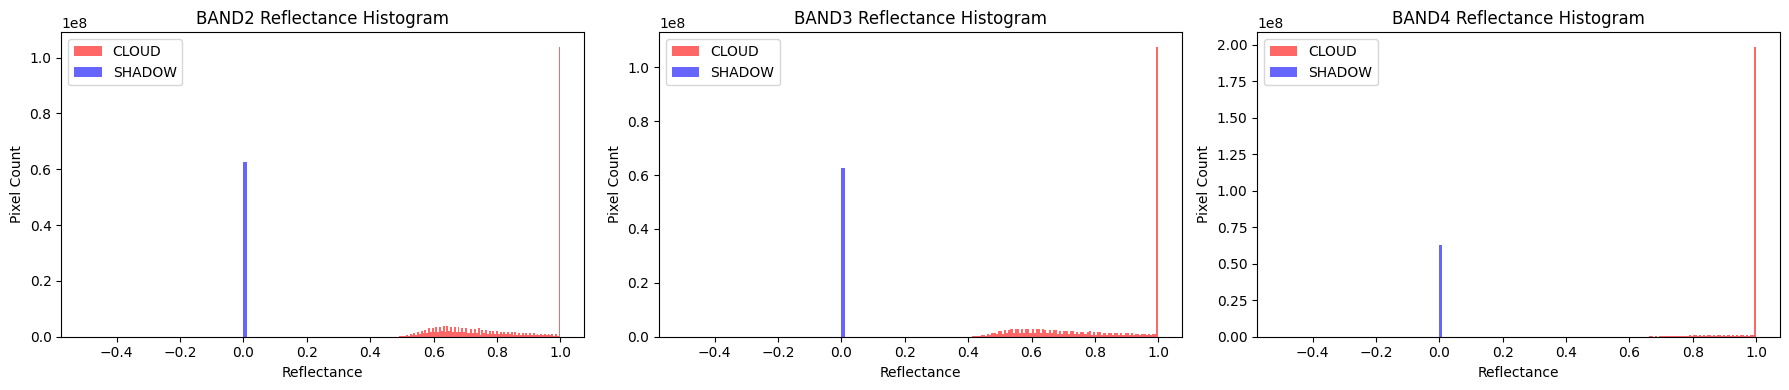

📊 Class-wise Reflectance Statistics:

--- NOCLOUD ---
BAND2: [no pixels]
BAND3: [no pixels]
BAND4: [no pixels]

--- CLOUD ---
BAND2: min=0.420, mean=0.841, max=1.000
BAND3: min=0.334, mean=0.828, max=1.000
BAND4: min=0.375, mean=0.976, max=1.000

--- SHADOW ---
BAND2: min=0.000, mean=0.000, max=0.000
BAND3: min=0.000, mean=0.000, max=0.000
BAND4: min=0.000, mean=0.000, max=0.000


In [61]:
analyze_reflectance_by_class(reflectance, mask)


In [62]:
mask = classify_pixels_temp(reflectance)

unique, counts = np.unique(mask, return_counts=True)
label_map = {0: "NOCLOUD", 1: "CLOUD", 2: "SHADOW"}
print("✅ Mask Class Distribution:")
for u, c in zip(unique, counts):
    print(f"{label_map[u]} ({u}): {c} pixels")


✅ Mask Class Distribution:
CLOUD (1): 236152451 pixels
SHADOW (2): 62507833 pixels


In [63]:
unique, counts = np.unique(mask, return_counts=True)
print(dict(zip(unique, counts)))


{np.uint8(1): np.int64(236152451), np.uint8(2): np.int64(62507833)}


In [64]:
import os

def save_mask(mask, meta, scene_path, output_root="../outputs/masks"):
    """
    Save a georeferenced mask with scene name in the output folder.
    - mask: numpy array (HxW)
    - meta: rasterio metadata
    - scene_path: full path to the scene folder
    - output_root: folder where masks will be stored
    """

    # Ensure output folder exists
    os.makedirs(output_root, exist_ok=True)

    # Extract scene name and set output path
    scene_name = os.path.basename(scene_path.rstrip("/"))
    output_path = os.path.join(output_root, f"{scene_name}_mask.tif")

    # Update metadata and write
    meta.update({
        "count": 1,
        "dtype": "uint8"
    })

    with rasterio.open(output_path, "w", **meta) as dst:
        dst.write(mask, 1)

    print(f"✅ Saved georeferenced mask: {output_path}")


In [65]:
save_mask(mask, meta, scene_path, output_root="../outputs/masks")

✅ Saved georeferenced mask: ../outputs/masks/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC_mask.tif


In [67]:
print(meta_path)

../data/train/cloud/BH_RAF10SEP2024040267010800054SSANSTUC00GTDC/BAND_META.txt


In [76]:
import os

def list_all_files(root_dir):
    for foldername, subfolders, filenames in os.walk(root_dir):
        print(f"\n📁 Folder: {foldername}")
        for filename in filenames:
            print("   └──", filename)

# ✅ Replace with your actual dataset path
dataset_path = "../data/train/cloud"
list_all_files(dataset_path)



📁 Folder: ../data/train/cloud
   └── .DS_Store

📁 Folder: ../data/train/cloud/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA
   └── ACC_REP.txt
   └── BAND_META.txt
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.meta
   └── BAND4.tif
   └── BAND2.tif
   └── BAND3.tif
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg.aux.xml

📁 Folder: ../data/train/cloud/BH_RAF08MAY2024038491010700053SSANSTUC00GTDA
   └── ACC_REP.txt
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.jpg
   └── .DS_Store
   └── BAND_META.txt
   └── BAND4.tif
   └── BAND2.tif
   └── BAND3.tif
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.meta
   └── RAF08MAY2024038491010700053SSANSTUC00GTDA.jpg.aux.xml

📁 Folder: ../data/train/cloud/BH_RAF08MAY2024038491010700053SSANSTUC00GTDA/BH_RAF16SEP2024040353009000054SSANSTUC00GTDA
   └── ACC_REP.txt
   └── BAND_META.txt
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.jpg
   └── RAF16SEP2024040353009000054SSANSTUC00GTDA.me